In [31]:
import tensorflow as tf

In [32]:
mnist = tf.keras.datasets.mnist

In [33]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [34]:
x_train.shape

(60000, 28, 28)

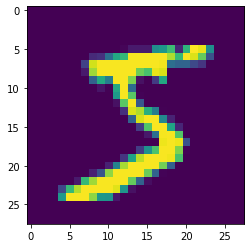

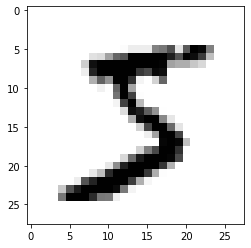

In [35]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [36]:
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

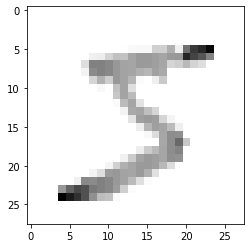

In [7]:
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [8]:
print(x_train[0]) #after normalisation

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(x_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

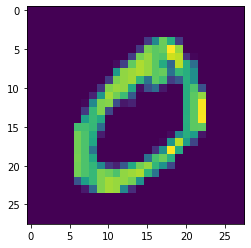

In [10]:
plt.imshow(x_train[1])
plt.show()

In [11]:
print (y_train[1]) #checking label on the sample

0


In [12]:
import numpy as np
IMG_SIZE=28
x_trainr= np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr= np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimension",x_trainr.shape)
print("Testing Samples dimension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


In [13]:
#Creating a deep neural network,training on 60000 samples of MNIST handwritten dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [14]:
# creating NN now
model = Sequential()
#First Convolution layer
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:])) #size mentioned only for first Conv Layer,one conv layer having 64 diff filters(kernels) of size 3*3
model.add(Activation("relu")) #Act func
model.add(MaxPooling2D(pool_size=(2,2))) #MaxPooling, single max value of 2*2 is allowed to pass

#2nd conv layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd conv layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully conntd layer 1
model.add (Flatten()) #before using fully conntd layer,need to flatten so that 2D to 1D coversion takes place
model.add (Dense(64))
model.add(Activation("relu"))

#Fully conntd layer 2
model.add (Dense(32))
model.add(Activation("relu"))

#Last Fully conntd layer 
model.add (Dense(10)) #o/p must be = no. of classes i.e 10 (0-9),therefore last dense layer = 10
model.add(Activation("softmax")) #act func changed to softmax which is famous for class probabilities
#for binary classification,sigmoid is used



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [16]:
print("Total training samples = "+str(len(x_trainr)))

Total training samples = 60000


In [17]:
#before training,compile the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [19]:
model.fit (x_trainr,y_train,epochs=1,validation_split=0.3) #Training the model

1313/1313 [==============================] - 183s 139ms/step - loss: 0.2220 - accuracy: 0.9334 - val_loss: 0.1348 - val_accuracy: 0.9586


In [21]:
#evaluating testing dataset of MNIST
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10000 test samples",test_loss)
print("Test accuracy on 10000 test samples",test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.1194 - accuracy: 0.9654
Test loss on 10000 test samples 0.11938553303480148
Test accuracy on 10000 test samples 0.965399980545044


In [22]:
predictions= model.predict([x_testr])

In [23]:
print (predictions)

[[3.1024135e-07 1.5123848e-05 2.3358368e-04 ... 9.9971944e-01
  1.9443876e-06 2.5881667e-05]
 [1.6517416e-02 9.8846480e-04 9.8041672e-01 ... 5.0758965e-05
  2.4586607e-04 1.8817939e-06]
 [9.6926606e-06 9.9925941e-01 3.1563700e-06 ... 4.3224311e-05
  1.2289265e-05 1.8736460e-05]
 ...
 [5.8891697e-08 4.5613915e-06 5.6662170e-08 ... 5.8580258e-06
  7.2602493e-06 7.2171140e-05]
 [1.4495986e-03 4.0270752e-06 3.6800268e-06 ... 6.2090090e-05
  1.0920762e-02 1.1055695e-03]
 [4.3245270e-03 8.0376021e-06 3.1791415e-04 ... 3.6663646e-08
  1.2357808e-04 2.4144873e-07]]


In [30]:
print(np.argmax(predictions[1:3])) 

11


In [ ]:
#checking if the answer is correct or not
plt.imshow(x_test[0])

# correct answer

In [ ]:
print(np.argmax(predictions[128])) 

In [ ]:
#checking if the answer is correct or not
plt.imshow(x_test[128])

# Correct

In [ ]:
import cv2

In [ ]:
img = cv2.imread('eight.png')

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #color image to B&W

In [ ]:
gray.shape #the 3rd channel is removed,only width and height there now

In [ ]:
resized = cv2.resize(gray, (28,28),interpolation = cv2.INTER_AREA)

In [ ]:
resized.shape #size of resized image

In [ ]:
newimg = tf.keras.utils.normalize (resized,axis = 1) #0 to 1 scaling

In [ ]:
newimg= np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1) #kernel operation of conv layer

In [ ]:
newimg.shape #check

In [ ]:
predictions= model.predict([newimg])

In [ ]:
print(np.argmax(predictions))

In [ ]:
img2 = cv2.imread('fortyseven.png')

In [ ]:
plt.imshow(img2)

In [ ]:
img2.shape

In [ ]:
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) #color image to B&W

In [ ]:
resized2 = cv2.resize(gray2, (28,28),interpolation = cv2.INTER_AREA)

In [ ]:
resized2.shape #size of resized image

In [ ]:
newimg2 = tf.keras.utils.normalize (resized2,axis = 1) #0 to 1 scaling

In [ ]:
newimg2= np.array(newimg2).reshape(-1,IMG_SIZE,IMG_SIZE,1) #kernel operation of conv layer

In [ ]:
newimg2.shape

In [ ]:
predictions= model.predict([newimg2])

In [ ]:
print(np.argmax(predictions))
